In [ ]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

In [ ]:
data = pd.read_csv("Final_Dataset.csv")
data.head()

,Feature1,Feature2,Feature3,Feature4,Feature5,Feature6,Feature7,Feature8,Feature9,Feature10,...,Feature504,Feature505,Feature506,Feature507,Feature508,Feature509,Feature510,Feature511,Feature512,Label
0,-0.085243,0.113741,-0.076008,-0.543246,-0.040613,-0.064269,0.120637,0.054244,-0.223260,-0.003807,...,0.040574,0.170891,0.017064,0.203531,-0.053761,0.197184,-0.023601,-0.032346,-0.044258,Adel_FerdowsiPour
1,-0.029085,0.066105,0.039280,-0.106409,-0.002791,-0.078842,0.103119,0.072104,-0.113969,-0.038479,...,0.228921,0.215228,0.010067,-0.000548,-0.128221,0.166132,-0.111272,0.169827,0.083473,Adel_FerdowsiPour
2,-0.036661,0.025960,0.005296,-0.286603,-0.023073,-0.038663,0.030502,-0.049440,0.045224,-0.150188,...,0.121677,0.097808,-0.048085,0.008427,-0.011010,0.083467,-0.089839,0.272914,0.121511,Adel_FerdowsiPour
3,-0.096928,0.230704,-0.043179,-0.219089,0.068789,-0.020304,0.136390,0.025754,-0.085352,-0.037839,...,0.038548,0.331350,-0.086856,0.023208,-0.066632,0.228283,-0.152493,0.013848,0.181227,Adel_FerdowsiPour
4,0.058346,0.109109,-0.011447,0.010425,-0.119775,-0.101330,-0.025975,0.147936,-0.083549,-0.054536,...,0.130704,0.195982,0.074712,0.156027,-0.137013,0.091660,-0.283446,0.203653,0.247721,Adel_FerdowsiPour


In [ ]:
data.isnull().sum()

,0
Feature1,0
Feature2,0
Feature3,0
Feature4,0
Feature5,0
...,...
Feature509,0
Feature510,0
Feature511,0
Feature512,0


In [ ]:
data.fillna(0, inplace=True)

In [ ]:
data.describe()

,Feature1,Feature2,Feature3,Feature4,Feature5,Feature6,Feature7,Feature8,Feature9,Feature10,...,Feature503,Feature504,Feature505,Feature506,Feature507,Feature508,Feature509,Feature510,Feature511,Feature512
count,602.000000,602.000000,602.000000,602.000000,602.000000,602.000000,602.000000,602.000000,602.000000,602.000000,...,602.000000,602.000000,602.000000,602.000000,602.000000,602.000000,602.000000,602.000000,602.000000,602.000000
mean,-0.052436,0.106872,-0.086973,-0.198395,-0.029209,0.026962,0.024781,0.006957,-0.022845,-0.014204,...,-0.193483,0.022610,0.049089,-0.104889,0.162465,-0.030780,-0.025837,0.083647,-0.011689,-0.180944
std,0.126380,0.274374,0.151308,0.206121,0.123046,0.169293,0.135876,0.139832,0.157977,0.129507,...,0.439248,0.185929,0.244675,0.310906,0.153725,0.165297,0.127322,0.138905,0.236314,0.465155
min,-0.479787,-0.606037,-0.657259,-0.736871,-0.520100,-0.295234,-0.429686,-0.462496,-0.578558,-0.388044,...,-2.171672,-0.659180,-0.511747,-1.408350,-0.370523,-0.567976,-0.434656,-0.544535,-0.887203,-2.131689
25%,-0.126605,-0.072871,-0.180734,-0.341182,-0.103606,-0.080118,-0.062649,-0.094918,-0.115305,-0.094755,...,-0.283153,-0.108123,-0.114452,-0.160788,0.055546,-0.113332,-0.102258,0.000559,-0.129178,-0.220858
50%,-0.052214,0.058117,-0.091249,-0.192530,-0.024414,-0.003619,0.045434,0.003312,-0.011354,-0.020405,...,-0.089803,0.038389,0.019803,-0.028635,0.156555,-0.007655,-0.027037,0.073091,0.017515,-0.065317
75%,0.033314,0.225365,0.012945,-0.062981,0.051923,0.089673,0.120300,0.101232,0.063858,0.077890,...,0.063759,0.155382,0.194705,0.086035,0.273483,0.089257,0.052098,0.169385,0.159231,0.069462
max,0.252291,1.170020,0.422990,0.483559,0.395132,0.727556,0.346469,0.495737,0.498948,0.326091,...,0.587068,0.544355,0.861760,0.433709,0.568134,0.432477,0.341245,0.545776,0.544726,0.511441


In [ ]:
X = data.iloc[:,:-1].values
Y = data.iloc[:,-1].values

label_encoder = LabelEncoder()

X_train , X_validation , Y_train , Y_validation = train_test_split(X,Y,test_size=0.2,random_state=4)
Y_train_encoded = label_encoder.fit_transform(Y_train)
Y_validation_encoded = label_encoder.transform(Y_validation)

X_train.shape , X_validation.shape , Y_train.shape , Y_validation.shape

((1343, 512), (336, 512), (1343,), (336,))

In [ ]:
print(Y_train_encoded[:10])
print(Y_validation_encoded[:10])

[22 29 26 17 10 17 22 31  8 11]
[ 2 11  1 20 25 21 19 15  2  9]


In [ ]:
class_mapping = dict(zip(label_encoder.classes_, range(len(label_encoder.classes_))))
print(class_mapping)

{'Adel_FerdowsiPour': 0, 'Ali_Daei': 1, 'Ali_Khamenei': 2, 'Asghar_Farhadi': 3, 'Bahare_Rahnama': 4, 'Behnam_Bani': 5, 'Behnoosh_Tabatabaee': 6, 'Dariush_Arjmand': 7, 'Ebi': 8, 'Ehsan_Alikhani': 9, 'Elham_Hamidi': 10, 'Elnaz_Shakerdoost': 11, 'Golshifteh_Farahani': 12, 'Hamid_Lolaei': 13, 'Hassan_Rouhani': 14, 'Hootan_Shakiba': 15, 'Javad_Khiabani': 16, 'Javad_Razavian': 17, 'Katayoun_Riahee': 18, 'Leyla_Hatami': 19, 'Mahnaz_Afshar': 20, 'Mehran_Ghafourian': 21, 'Mehran_Modiri': 22, 'Mohsen_Chavoshi': 23, 'Mohsen_Tanabandeh': 24, 'Parinaz_Izadyar': 25, 'Parsa_Pirozfar': 26, 'Parviz_Parastooee': 27, 'Sahar_Dolarshahi': 28, 'Shahab_Hosseini': 29, 'Siamak_Ansari': 30, 'Siavash_Ghomayshi': 31, 'Tannaz_Tabatabaee': 32, 'Taraneh_Alidoosti': 33}


In [ ]:
model = tf.keras.models.Sequential(
   [ tf.keras.layers.Dense(512,activation="relu"), # input
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(256,activation="relu"), #Hidden 1
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(128,activation="relu"), # Hidden 2
     tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(64,activation="relu"), # Hidden 3
     tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(34,activation="softmax")] # output classification
)

In [ ]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), loss="sparse_categorical_crossentropy", metrics=["accuracy"])

In [ ]:
result = model.fit(X_train, Y_train_encoded, epochs=50, validation_data=(X_validation, Y_validation_encoded))

Epoch 1/50
42/42 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - accuracy: 0.0801 - loss: 3.4472 - val_accuracy: 0.3036 - val_loss: 2.7854
Epoch 2/50
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.2810 - loss: 2.6639 - val_accuracy: 0.6071 - val_loss: 1.6163
Epoch 3/50
42/42 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.5325 - loss: 1.7442 - val_accuracy: 0.7589 - val_loss: 0.9753
Epoch 4/50
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.6320 - loss: 1.3427 - val_accuracy: 0.8095 - val_loss: 0.7513
Epoch 5/50
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.6936 - loss: 1.0866 - val_accuracy: 0.8393 - val_loss: 0.6505
Epoch 6/50
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.7684 - loss: 0.8799 - val_accuracy: 0.8571 - val_loss: 0.5790
Epoch 7/50
42/42 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.7829 - loss: 0.7834 - val_accuracy: 0.8571 - val_loss: 0.5670
Epoch 8/50
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.8291 - loss: 0.6340 - val_accuracy: 0.8542 - v

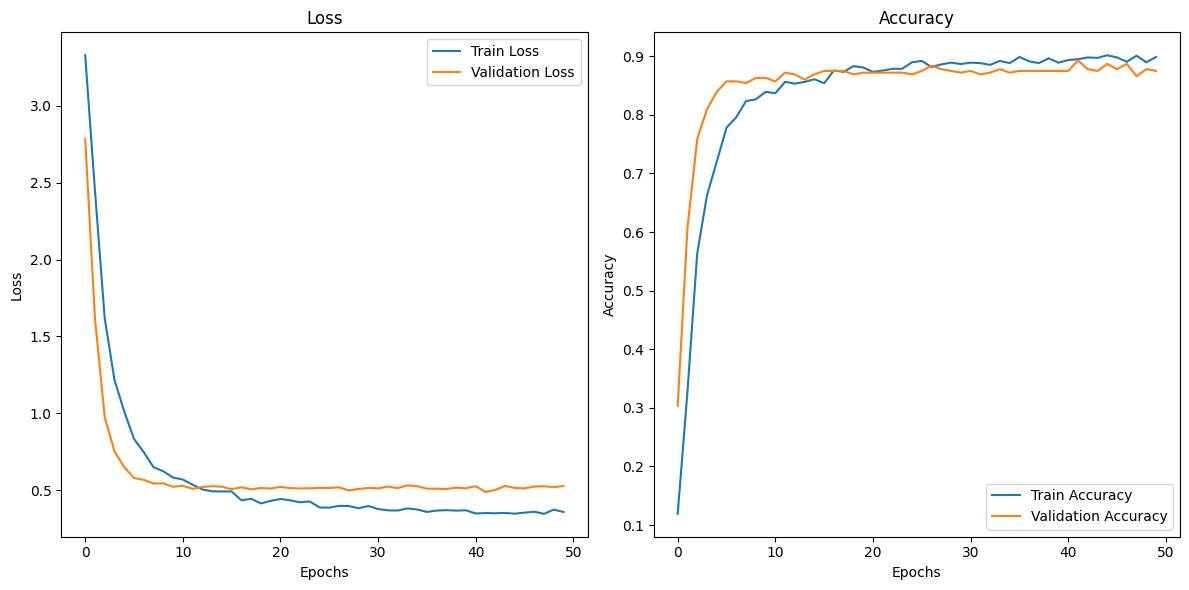

In [ ]:

plt.figure(figsize=(12, 6))

# Loss
plt.subplot(1, 2, 1)
plt.plot(result.history['loss'], label='Train Loss')
plt.plot(result.history['val_loss'], label='Validation Loss')
plt.title('Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Accuracy
plt.subplot(1, 2, 2)
plt.plot(result.history['accuracy'], label='Train Accuracy')
plt.plot(result.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()


In [ ]:
model.save("Face_Recognition.h5")